# Titanic Random Forest



### Imports

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

### Data Download

In [2]:
data_dir = Path('../../dacon-inputs/titanic/input')
sub_dir = Path('../../dacon-inputs/titanic/sub')
feature_dir = Path('../../dacon-inputs/titanic/feature')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'submission.csv'
feature_file = feature_dir / 'numerical_features.csv'
seed = 42

In [3]:
data_dir.resolve()

WindowsPath('C:/Users/bryan/dacon-inputs/titanic/input')

### Random Forest

In [4]:
target_col = 'Survived'

In [5]:
algo_name = 'rf'
feature_name = 'numerical_features'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

(1309, 6)


,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.0,3,22.0,1,0,7.2500
2,1.0,1,38.0,1,0,71.2833
3,1.0,3,26.0,0,0,7.9250
4,1.0,1,35.0,1,0,53.1000
5,0.0,3,35.0,0,0,8.0500


In [7]:
# Split Train/Test Data
y = df[target_col].values[:891]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:891]
tst = df.iloc[891:]
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(891,) (891, 5) (418, 5)


In [8]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(712, 5) (179, 5) (712,) (179,)


In [9]:
# Train RF Classifier
clf = RandomForestClassifier(n_estimators=100,
                             min_samples_leaf=10,
                             max_features='auto',
                             max_samples=.5,
                             random_state=seed,
                             n_jobs=-1)
clf.fit(X_trn, y_trn)
p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

In [10]:
print(f'{accuracy_score(y_val, p_val) * 100:.4f}%')

76.5363%


<AxesSubplot:ylabel='feature'>

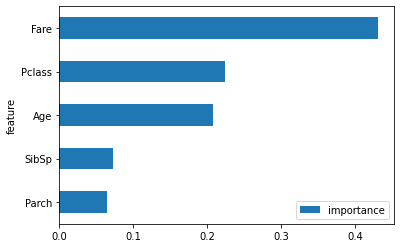

In [11]:
# Visualize Feature Importance
imp = pd.DataFrame({'feature': trn.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

In [12]:
# Create Submission File
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [13]:
sub[target_col] = p_tst
sub.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,0.0


In [14]:
sub[target_col].value_counts()

0.0    311
1.0    107
Name: Survived, dtype: int64

In [15]:
# Saving Submission File
sub.to_csv(sub_file)